In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import tsplot
import statsmodels
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import probplot

from statsmodels.tsa.arima_model import ARIMA

In [9]:
data1 = pd.read_csv('stock/AAPL.csv', index_col = 0)
data2 = pd.read_csv('stock/KO.csv', index_col = 0)
data3 = pd.read_csv('stock/GS.csv', index_col = 0)
data4 = pd.read_csv('stock/HD.csv', index_col = 0)
data5 = pd.read_csv('stock/JNJ.csv', index_col = 0)
data6 = pd.read_csv('stock/WMT.csv', index_col = 0)




In [10]:
def trans(data):
    data['log_return'] = 0
    dates = data.index
    for i,date in enumerate(dates[1:]):
        close = data.loc[date, 'close']
        prev_close = data.loc[dates[i],'close']
        data.loc[date, 'log_return'] = 100*np.log(close/prev_close)
    y_t=data['log_return'].tolist()#log return
    
    return y_t

In [11]:
y1=trans(data1)
y2=trans(data2)
y3=trans(data3)
y4=trans(data4)
y5=trans(data5)
y6=trans(data6)

Text(0.5, 0.98, 'log return distributions for the 6 stocks')

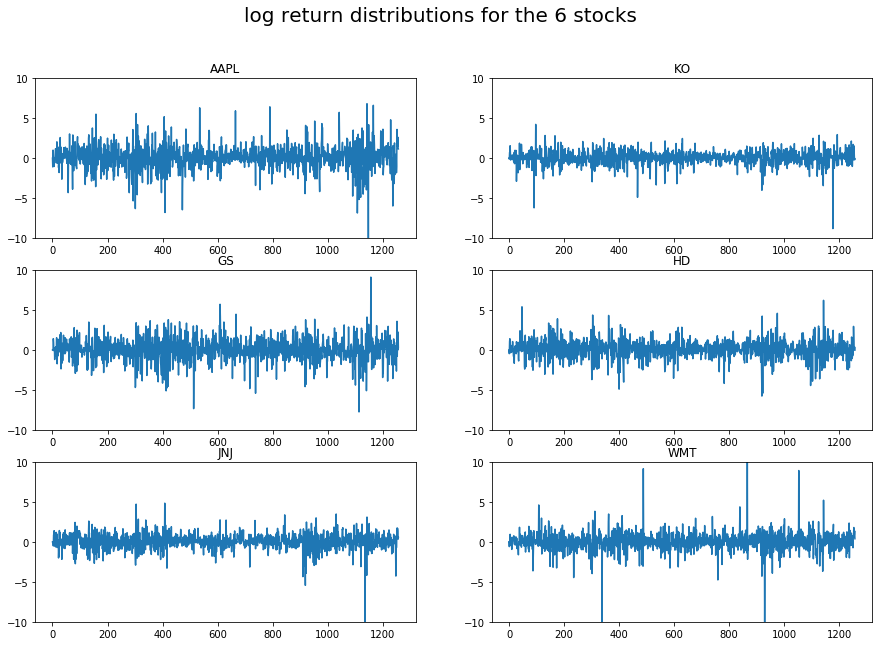

In [12]:
fig=plt.figure(figsize = (15,10))
plt.subplot(3, 2, 1)
plt.plot(y1)
plt.title('AAPL')
axes = plt.gca()
axes.set_ylim([-10,10])

plt.subplot(3, 2, 2)
plt.plot(y2)
plt.title('KO')
axes = plt.gca()
axes.set_ylim([-10,10])

plt.subplot(3, 2, 3)
plt.plot(y3)
plt.title('GS')
axes = plt.gca()
axes.set_ylim([-10,10])

plt.subplot(3, 2, 4)
plt.plot(y4)
plt.title('HD')
axes = plt.gca()
axes.set_ylim([-10,10])

plt.subplot(3, 2, 5)
plt.plot(y5)
plt.title('JNJ')
axes = plt.gca()
axes.set_ylim([-10,10])

plt.subplot(3, 2, 6)
plt.plot(y6)
plt.title('WMT')
axes = plt.gca()
axes.set_ylim([-10,10])

fig.suptitle('log return distributions for the 6 stocks',fontsize=20)

In [27]:
from scipy.stats import kurtosis
import statistics
print(kurtosis(y1))
print(kurtosis(y2))
print(kurtosis(y3))
print(kurtosis(y4))
print(kurtosis(y5))
print(kurtosis(y6))


4.279150814207942
10.386012912838043
2.8965490593686347
2.8302253926615304
11.813628504529452
17.46858839212832
